### Vamos ao nosso desafio!!!

    Churn Prediction
    Uma determinada empresa financeira deseja uma solução de IA que indique quais clientes irão cancelar o serviço 
    em um futuro próximo.


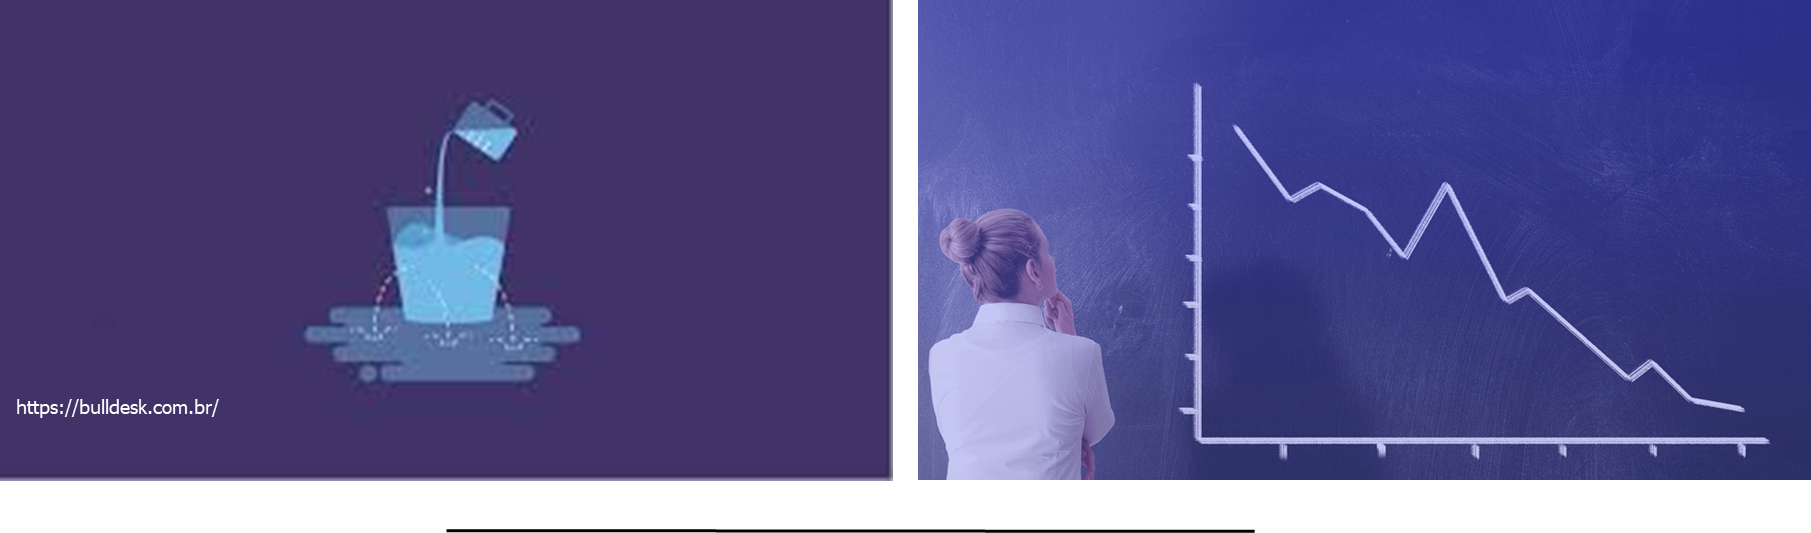


# Prever se uma pessoa vai fechar a conta no banco

Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling





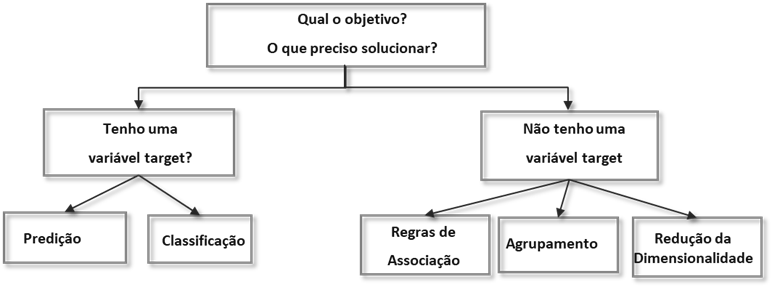





     As técnicas Supervisionadas de Predição: Se aplica quando a variável de interesse/target é numérica quantitativa
     
     As técnicas Supervisionadas de Classificação: Se aplica quando a variável de interesse/target é categórica 

    Base de dados: 
    CostumerId:  código numérico que identifica o cliente de forma única
    Surname: Sobrenome do cliente
    CreditScore: Score creditício do cliente
    Geography: Localidade do cliente
    Age: idade do cliente
    Gender: Identificação do gênero do cliente
    Tenure: Período de fechamento de uma empréstimo
    Balance: Valor de saldo em conta
    NumOfProducts: número de produtos que o cliente tem na instituição
    HasCrCard: Se pussui cartão de crédito
    IsActivemember: Se é membro ativo da plataforma da instituição
    EstimatedSalary: Salário estimado ao ano
    Exited: se saiu da base de clientes


In [ ]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Com esse comando "%matplotlib inline", a saída dos comandos de plotagem é exibida inline em frontends como o notebook Jupyter, 
# diretamente abaixo da célula de código que o produziu.
# Os gráficos resultantes também serão armazenados no documento do caderno.”

# https://ipython.readthedocs.io/en/stable/interactive/plotting.html



import sklearn
 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


  Vamos usar as bibliotecas do scikit Learn
  

https://scikit-learn.org/stable/getting_started.html


In [ ]:
# Importar os dados
df = pd.read_csv('Churn_Modelling.csv')
df.head()

   ==> Em uma primeira avaliação das variáveis já encontramos a nossa variável target: Exited

In [ ]:
# dataset info to find columns and count of the data 
df.info()


In [ ]:
# excluindo variáveis que não são necessárias
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head() 

In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(df.isnull().sum(), df.isnull().sum()/len(df)), columns=['Count', 'Proportion'], index=df.columns)


In [ ]:
# algumas analises descritivas 
df.describe().T

In [ ]:
# Variável target: "Exited" : Quantos Churn
(df.Exited.value_counts() / df.shape[0]) * 100

  Agora é a vez de avaliar as variáveis preditoras!!
  Começaremos com as variáveis numéricas

In [ ]:
# Variável preditora: Age

sb.histplot(data=df, x="Age");

      ==> avaliar a variável preditora em função da variável target

In [ ]:
# Variável Age  - avaliada pelas classes de churn
sb.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribuição de Age por Churn')
plt.show()

In [ ]:
# Variável preditora: CreditScore

sb.histplot(data=df, x="CreditScore");

In [ ]:
# Variável CreditScore - avaliada pelas classes de churn

sb.boxplot(x='Exited', y='CreditScore', data=df);

In [ ]:
# Variável preditora: Tenure 

sb.histplot(data=df, x="Tenure");

In [ ]:
# Variável Tenure - avaliada pelas classes de churn

sb.boxplot(x='Exited', y='Tenure', data=df);

In [ ]:
# comparison between HasCrCard and target

Tenure_cat = pd.crosstab(df['Exited'],df['Tenure'])
Tenure_cat.div(Tenure_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# Balance: Valor de saldo em conta

sb.histplot(data=df, x="Balance");

In [ ]:
sb.boxplot(x='Exited', y='Balance', data=df, );

In [ ]:
sb.boxplot(x='Exited', y='NumOfProducts', data=df);

In [ ]:
# comparison between NumOfProducts and target

NumOfProducts_cat = pd.crosstab(df['Exited'],df['NumOfProducts'])
NumOfProducts_cat.div(NumOfProducts_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# 

In [ ]:
sb.histplot(data=df, x="EstimatedSalary");

In [ ]:
sb.boxplot(x='Exited', y='EstimatedSalary', data=df);

  Continuamos com a avaliação das variáveis preditoras 
  Agora com as variáveis categóricas

In [ ]:
# comparison between Gender and target

Gender_cat = pd.crosstab(df['Exited'],df['Gender'])
Gender_cat.div(Gender_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# comparison between Geography and target

Geography_cat = pd.crosstab(df['Exited'],df['Geography'])
Geography_cat.div(Geography_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# comparison between IsActiveMember and target

IsActiveMember_cat = pd.crosstab(df['Exited'],df['IsActiveMember'])
IsActiveMember_cat.div(IsActiveMember_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# comparison between HasCrCard and target

HasCrCard_cat = pd.crosstab(df['Exited'],df['HasCrCard'])
HasCrCard_cat.div(HasCrCard_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
df.info()

In [ ]:
# transformando as variveis categoricas 

baseline_df = pd.get_dummies(df, drop_first=True)



In [ ]:
baseline_df.info()

In [ ]:
baseline_df.head() 

In [ ]:
# usando diferentes classificadores 
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento


In [ ]:
X = baseline_df[baseline_df.columns.difference(['Exited'])].values
print(X)


In [ ]:
y = baseline_df['Exited'].values
print(y)

## 1. parte com a presença de desproporcionalidade da  variável target 

#### Relembrando: Neste caso a variável target : Exited (0=não saiu 1=saiu(churn))

In [ ]:
# Variável target: "Exited" : Quantos Churn
(df.Exited.value_counts() / df.shape[0]) * 100

    Holdout  -  Separar a sua base de dados em base de treino e base de teste.
    base de treino (train data) será utilizada para treinar seu modelo.
    base de teste (test data) refere-se à amostra de dados que será utilizada para avaliar o desempenho do seu modelo,
    medindo a capacidade do modelo de generalização (se ele funciona bem em outros dados)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(baseline_df.drop('Exited',axis=1),baseline_df['Exited'],test_size=0.3, random_state=17)


In [ ]:
X_treino.describe().T

In [ ]:
X_treino.shape, y_treino.shape

    TÉCNICAS DE TRANSFORMAÇÃO DOS DADOS 
  

    A escala das variáveis pode afetar muito a qualidade das predições.
    Alguns algoritmos darão preferência para utilizar variáveis com valores muito alto.
    
    Normalização Min-Max - transformação, onde os dados de um atributo são normalizados gerando valores  entre  0,0 a 1,0.
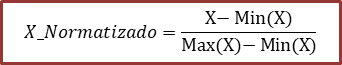
    
    Padronizar as variáveis contínuas para todas terem média de 0 e desvio-padrão de 1.

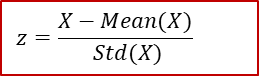

In [ ]:
# Feature Scaling 
# Only on Independent Variable 

from sklearn.preprocessing import MinMaxScaler

cols = X_treino.columns

MinMax = MinMaxScaler()

X_treino = MinMax.fit_transform(X_treino)
X_teste = MinMax.transform(X_teste)

X_treino = pd.DataFrame(X_treino, columns=[cols])

In [ ]:

X_treino.columns

In [ ]:
X_treino.head()

In [ ]:
X_treino.describe().T

In [ ]:
y_treino

# Quais são alguns tipos de modelo:

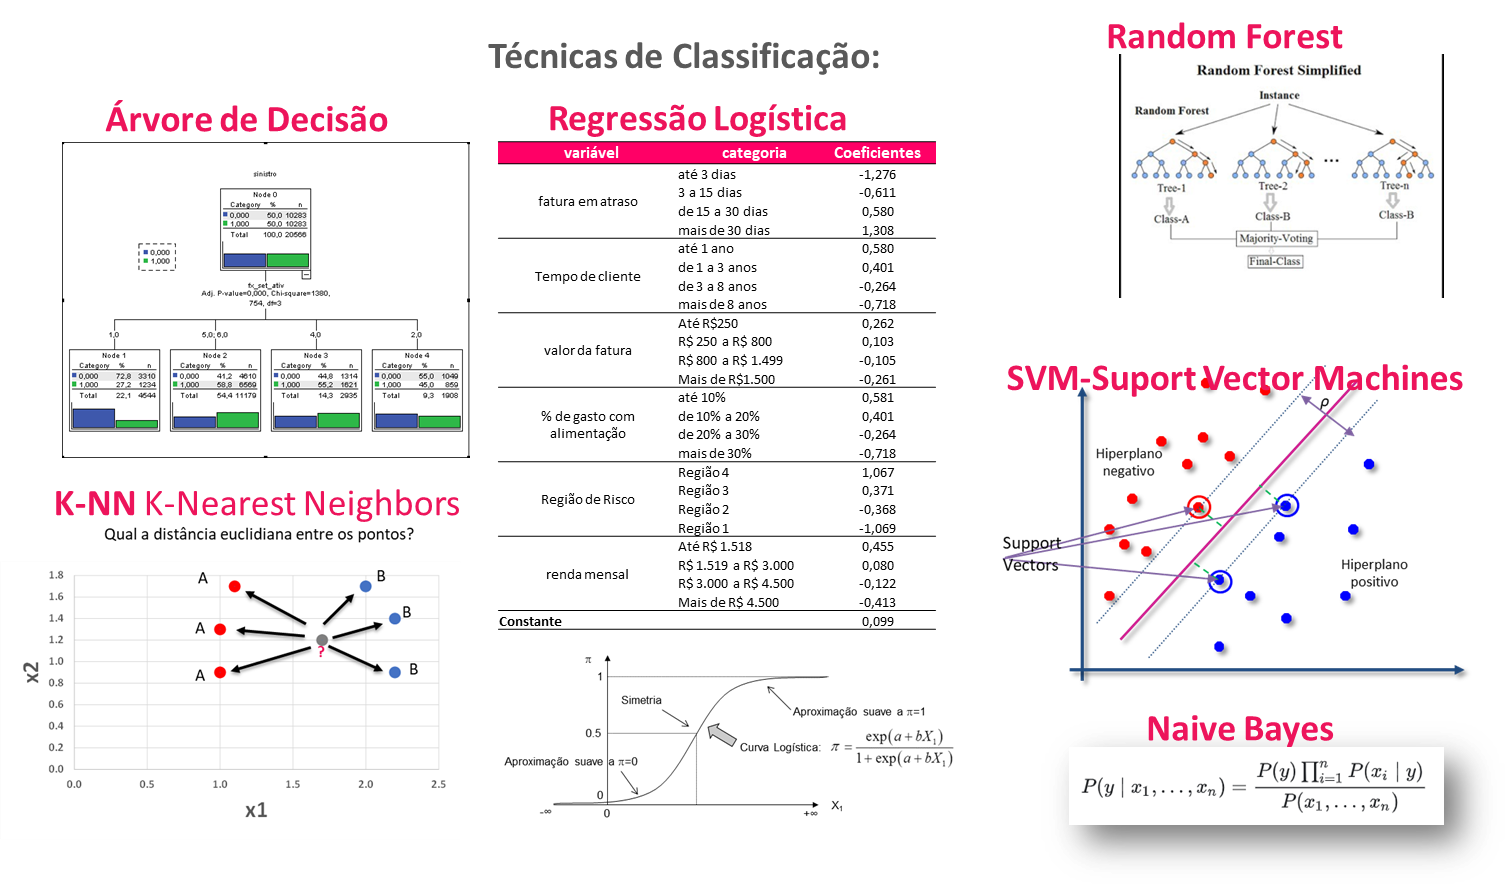

# 1.o MODELO: ÁRVORE DE DECISÃO 

Existem vários algoritmos que podem ser utilizados nessas árvores, dentre eles o ID3, C4.5 e o CART. O foco será esta última abordagem, que é a utilizada pelo scikit-learn. Ela se baseia na separação binária (True | False) de condições utilizando os atributos — features — dos dados.

Esses modelos de aprendizado supervisionado são empregados em tarefas tanto de regressão quanto classificação. O objetivo do método é criar uma árvore que aprende com os dados por meio de regras básicas, chamadas de if-then rules. O modelo identifica qual é o melhor atributo para separar os dados utilizando o critério escolhido, que, neste caso, pode ser entropy ou gini.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### Hiperparâmetros



tree = DecisionTreeClassifier(

criterion='gini', # gini vem por default, mas podemos optar por entropy

splitter='best', # a estratégia utilizada para fazer a separação de cada nó 
    # ela também pode ser feita de forma randômica utilizando 'random'
    
max_depth= None, # a máxima profundida que sua árvore de decisão pode ter
    # se for None ela vai buscar a máxima pureza possível
    
min_samples_split = 2, # o mínimo de registros necessários para que uma separação seja feita

min_samples_leaf = 1, # o mínimo de registros necessários em cada nós-folha (veja a primeira imagem)

max_features = None, # o número de atributos que será considerado durante o split
    # None -> seleciona todos os atributos, 'sqrt' -> raiz quadrada do número dos atributos, 'log2' -> log de base 2 do número de atributos
    
max_leaf_nodes=None, # a quantidade máxima de nós-folha que a árvore pode ter
    # se for None ele não limitará o número de nós-folha
    
min_impurity_decrease=0.0, # o split irá ocorrer em cada nó se o decréscimo da impureza foi maior ou igual a este valor

random_state= 42, # permite o notebook ser reproduzível


In [ ]:
# Criando modelo 

#Classif_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, 
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0,
#             random_state=None, splitter='best')



Classif_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=30, min_samples_split=10,
            min_weight_fraction_leaf=0.0, random_state=17, splitter='best')

In [ ]:
Classif_tree

In [ ]:
# Treinando o modelo de arvore de decisão:

Classif_tree.fit(X_treino, y_treino)

In [ ]:
# testando nova saída da árvore com alguns parâmetros de visualização

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
input_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
a = plot_tree(Classif_tree, fontsize=12,filled=True,feature_names=input_features, 
class_names=['NÂO', 'SIM'])  

In [ ]:
# Verificando as features mais importantes para o modelo treinado:

for feature,importancia in zip(X_treino.columns,Classif_tree.feature_importances_*100):
    print("{}:{}".format(feature, importancia))  
    

In [ ]:
# criando um dicionário com as variáveis mais importantes para o modelo treinado
dic = {'score':Classif_tree.feature_importances_*100,'features':cols}
#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df

In [ ]:
# Testando o modelo
y_pred_tree = Classif_tree.predict(X_teste)

In [ ]:
y_pred_tree


### Avaliação de Desempenho dos Algoritmos

### Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_tree = confusion_matrix(y_true=y_teste, y_pred=y_pred_tree, labels=Classif_tree.classes_) 
confusion_matrix_tree


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tree,
                             display_labels=Classif_tree.classes_)

disp.plot()

 ####  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    
    # Resultado do classification_report:
    
    # Precision score = VP/(FP+VP)
    
    # Recall score = VP/(FN+VP)
    
    # F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)
        # F1 Score pode ser interpretado como uma média harmônica entre Precision e Recall Score 
        # F1 Score apresenta melhor resultado quando o valor é 1 e pior escore em 0.

In [ ]:
#classification_report:

print(classification_report(y_teste, y_pred_tree))

# Resultado do classification_report:

# 2.o MODELO: REGRESSÃO LOGÍSTICA

     Modelo de Regressão Logística
        G = a+ B1 X1 + B2 X2 + ...+ Bn Xn
        G: logit da resposta de preferência (sim) a : 
        Intersecção B1, B2, ...,Bn : coeficientes logísticos
 

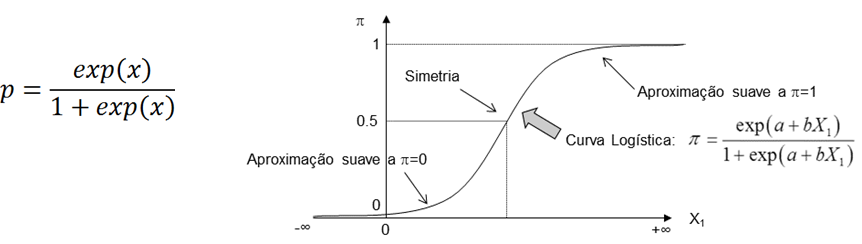

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


A penalização L2 é conhecida como penalização Ridge.
O objetivo é buscar minimizar o erro e o tamanho dos parâmetros.
A penalização ridge encolhe os parâmetros, mas não reduz nenhum a 0, não faz seleção de variáveis.
Para isso, existe a penalização Lasso (L1).

In [ ]:
# logreg = LogisticRegression(penalty='none',random_state=17)

logreg = LogisticRegression(penalty='l2',random_state=17)



In [ ]:
logreg

In [ ]:
#Em seguida, você precisa treinar o seu modelo. Precisamos rodar a regressão para X_train e y_train:

# treina o modelo
logistica = logreg.fit(X_treino, y_treino)  #fitting the model 

In [ ]:
print(logistica.coef_) 

In [ ]:
cols

In [ ]:
# Os coeficientes do modelo (b1,b2,b3....)

coefficients = pd.concat([pd.DataFrame(cols),pd.DataFrame(np.transpose(logistica.coef_))], axis = 1)
coefficients

In [ ]:
# faz predicao e salva em y_pred
 
y_pred_log = logistica.predict(X_teste)
y_pred_log

In [ ]:
# acuracia
logistica.score(X_teste, y_teste)

In [ ]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(y_teste, y_pred_log)
confusion_matrix_log

In [ ]:
print(classification_report(y_teste, logistica.predict(X_teste)))

# Outros Algoritmos

# 3.o MODELO:  KNN K-Nearest Neighbors

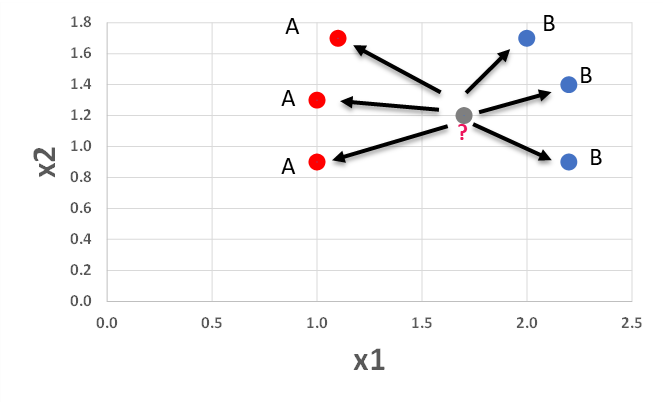

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KNN_classificador = KNeighborsClassifier(n_neighbors = 5)

KNN_classificador.fit(X_treino, y_treino)


In [ ]:
X_teste

In [ ]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_KNN = confusion_matrix(y_teste, KNN_classificador.predict(X_teste))
confusion_matrix_KNN

In [ ]:
print(classification_report(y_teste, KNN_classificador.predict(X_teste)))

# 4.o MODELO: SVM Support Vector Machine

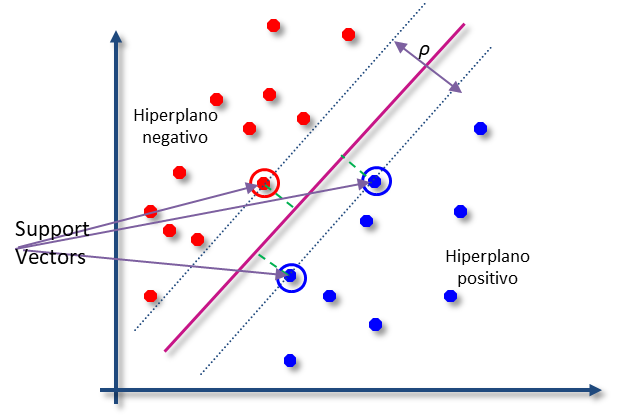

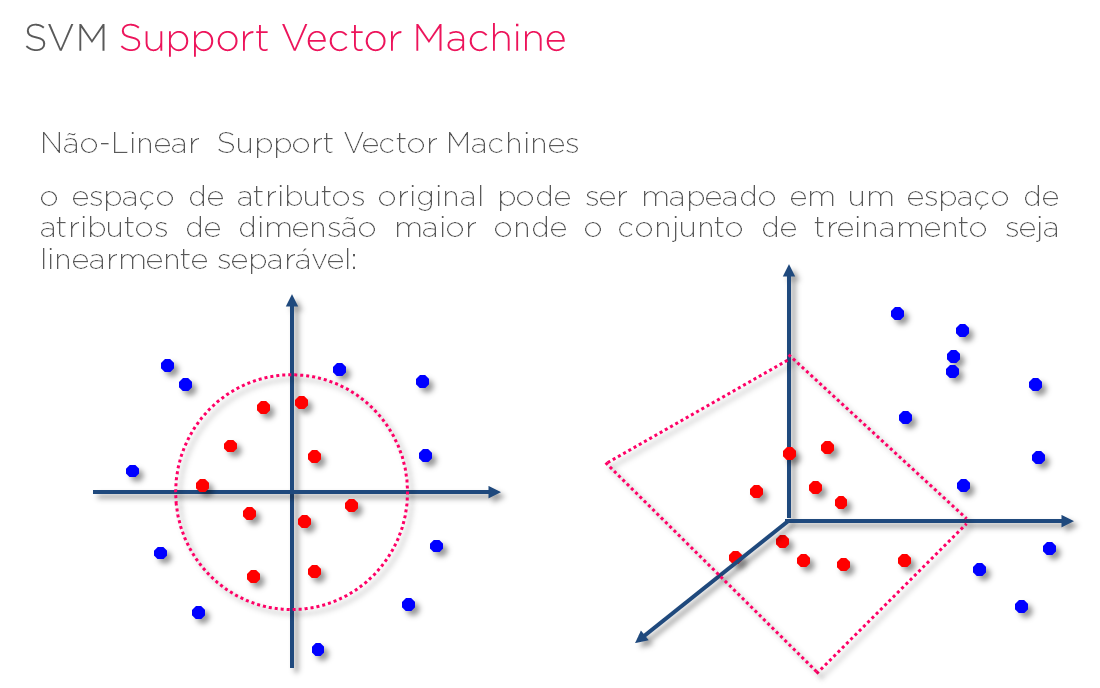

Documentação de referência: 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm


In [ ]:
from sklearn.svm import LinearSVC

modelo_SVM = LinearSVC(random_state=17, dual=False)
modelo_SVM.fit(X_treino, y_treino)

In [ ]:
y_pred_SVM = modelo_SVM.predict(X_teste)

In [ ]:
# matriz de confusao

confusion_matrix_SVM = confusion_matrix(y_teste, y_pred_SVM)
confusion_matrix_SVM

In [ ]:
print(classification_report(y_teste, modelo_SVM.predict(X_teste)))

# 5.o MODELO: Naive Bayes

    O classificador Naïve Bayes que é baseado em modelo probabilístico, ou seja, a partir de uma tabela probabilística realiza-se uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. 
    Este é um dos algoritmos de aprendizado supervisionado mais simples. Tem como premissa a suposição de independência entre as variáveis do problema. Isto é, o classificador Naïve Bayes assume que o efeito de uma determinada variável é independente de outras variáveis. Mesmo que essas características dependam umas das outras, todas contribuem independentemente para a probabilidade e, é por isso que ele é conhecido como “naïve” (ingênuo).   


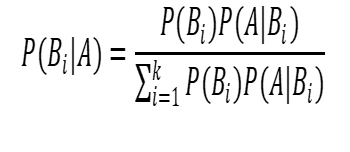

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbGau = GaussianNB()

In [ ]:
# aplicando o algoritmo na  base treino
nbGau.fit(X_treino, y_treino)

In [ ]:
# Let’s predict the test results
y_pred_nbGau  =  nbGau.predict(X_teste)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_nbGau = confusion_matrix(y_teste, y_pred_nbGau)
cm_nbGau

In [ ]:
print(classification_report(y_teste, y_pred_nbGau))

# Resultado do classification_report:

 # Modelos Ensemble
 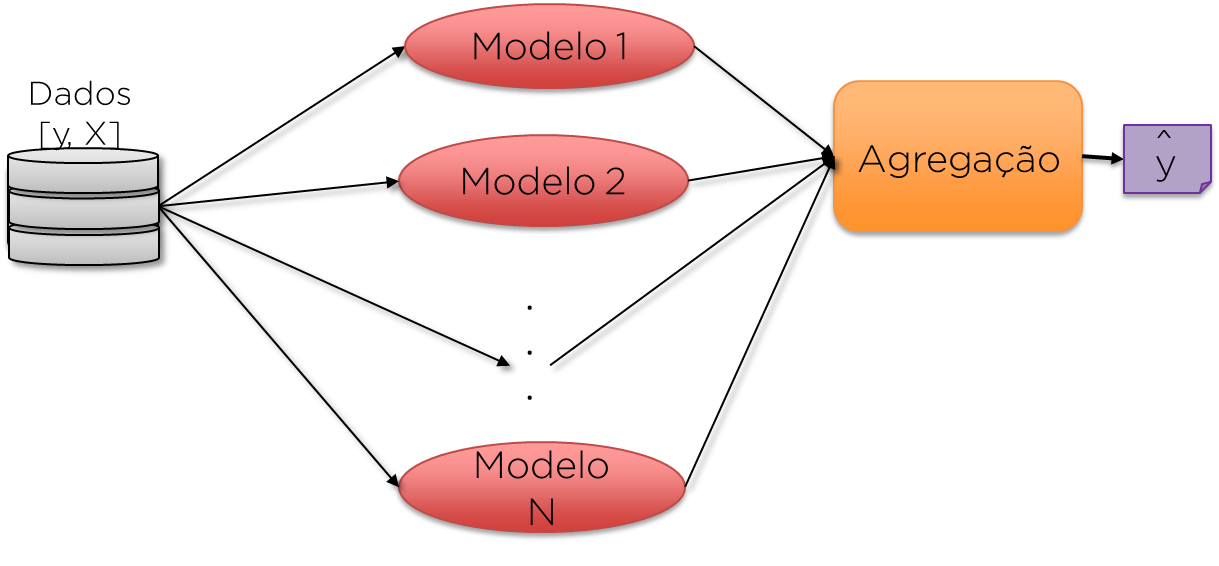

## Tipos de Modelos Ensemble

###     Características Principais:

       *Bagging* geralmente usa mesmo tipo de modelos individuais, cada um de forma independente em relação ao outro, 
    de forma paralela. O algoritmo final é então feito a partir de algum tipo de resultado médio do que foi obtido a partir dos modelos bases.
    

       *Boosting* geralmente usa mesmo tipo de modelos individuais, que são aplicados de forma sequencial 
    (o posterior depende do antecessor) e depois combinados no modelo final.
    

       *Stacking* geralmente usa tipos diferentes de modelos individuais, treinando-os em paralelo. 
    É então aplicado um modelo no output dos weak learners (podendo incluir ou não as features utilizadas para treiná-los).



# 5.o MODELO: Random Forest



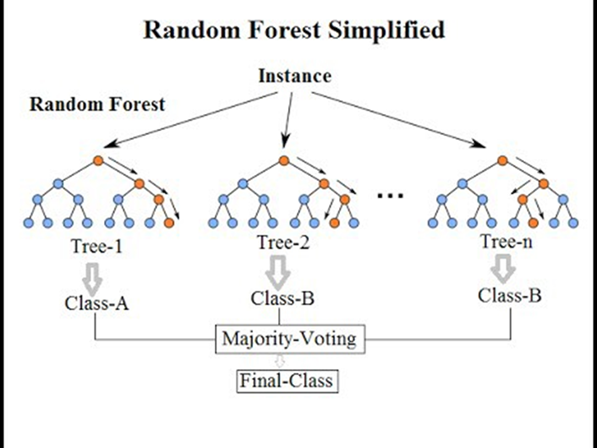

Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=50, random_state=17,criterion='entropy', n_jobs=-1)
random_forest.fit(X_treino, y_treino)

In [ ]:
y_pred_RF = random_forest.predict(X_teste)
 

In [ ]:
y_pred_RF

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix_RF = confusion_matrix(y_teste, y_pred_RF)
confusion_matrix_RF

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred_RF))

# Resultado do classification_report:

In [ ]:
for caracteristica, score in zip(X_treino, random_forest.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))

In [ ]:
# criando um dicionário com as variáveis mais importantes para o modelo treinado
dic = {'score':random_forest.feature_importances_*100,'features':cols}
#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df

# 6.o MODELO: Voting Ensemble

In [ ]:
# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

from sklearn.ensemble import VotingClassifier



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', min_samples_split=100)
nbCat = CategoricalNB()
svm = LinearSVC(max_iter=5000 , dual=False)
nbGau = GaussianNB()

voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree), ('knn', knn), ('nb', nbGau), ('svm', svm)], 
    n_jobs=-1)

voting_clf.fit(X_treino, y_treino)


#voting{‘hard’, ‘soft’}, default=’hard’
# If ‘hard’, uses predicted class labels for majority rule voting.
# Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities,
# which is recommended for an ensemble of well-calibrated classifiers.

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (decision_tree, knn,  nbGau, svm , voting_clf):
  clf.fit(X_treino, y_treino)
  y_predito = clf.predict(X_teste)
  acuracia = accuracy_score(y_teste, y_predito)
  print("Classificador {} tem acurácia de {}".format(clf.__class__.__name__, acuracia))

In [ ]:

# Matriz de Confusão

confusion_matrix_VOT = confusion_matrix(y_teste, voting_clf.predict(X_teste))
confusion_matrix_VOT

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, voting_clf.predict(X_teste)))

# Resultado do classification_report:

In [ ]:
# importância das variáveis na árvore de decisão

for feature,importancia in zip(X_treino.columns,decision_tree.feature_importances_):
    print("{}:{}".format(feature, importancia))

# Boosting

    O Gradient Boosting é um outro tipo de algoritmo de Boosting.
    
    Técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um conjunto de modelos simples (baixa previsão), geralmente árvores de decisão.
    
    Ele constrói o modelo em etapas. O objetivo do algoritmo é criar uma corrente de modelos fracos, onde cada um tem como objetivo minimizar o erro do modelo anterior, por meio de uma função de perda.
    
    Os erros são minimizado pelo algoritmo de gradiente descendente(gradient descending).
    
    Aos ajustes de cada modelo fraco é multiplicado um valor chamado de taxa de aprendizagem. Esse valor, tem como objetivo determinar o impacto de cada árvore no modelo final. Quanto menor o valor, menor a contribuição de cada árvore.


# 7.o MODELO:  Gradient Boosting 

    O Gradient Boosting é um outro tipo de algoritmo de Boosting.
    
    Técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um conjunto de modelos simples (baixa previsão), geralmente árvores de decisão.
    
    Ele constrói o modelo em etapas. O objetivo do algoritmo é criar uma corrente de modelos fracos, onde cada um tem como objetivo minimizar o erro do modelo anterior, por meio de uma função de perda.
    
    os erros são minimizado pelo algoritmo de gradiente descendente(gradient descending).
    
    Aos ajustes de cada modelo fraco é multiplicado um valor chamado de taxa de aprendizagem. Esse valor, tem como objetivo determinar o impacto de cada árvore no modelo final. Quanto menor o valor, menor a contribuição de cada árvore.


In [ ]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_treino, y_treino)

In [ ]:
y_predito = gradient_boost.predict(X_teste)
 

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

In [ ]:
for caracteristica, score in zip(X_treino, gradient_boost.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))



# 8.o MODELO: XGBoost (Extreme Gradient Boosting)

    O XGBoost, baseado em algoritmos de árvores de decisão e que utiliza uma estrutura de Gradient boosting 
    (aumento de Gradiente);
    
    XGBoost um Gradiente Boosting “tunado” - combina técnicas de otimização de software e hardware para produzir resultados superiores usando menos recursos de computação no menor período de tempo.


In [ ]:
# Documentação sobre XGBoost https://xgboost.readthedocs.io/en/stable/index.html

!pip install  xgboost

In [ ]:
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
X_treino

In [ ]:

xgb = xgboost.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.01, n_jobs=-1)
bst = xgb.fit(X_treino, y_treino)



In [ ]:
y_predito = xgb.predict(X_teste)
 

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0', '1'])
disp.plot();



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

In [ ]:
y_predito

In [ ]:
from xgboost import plot_importance
    
# Plot feature importance
plot_importance(xgb);

## 2. parte com a presença de desproporcionalidade da  variável target 

#### A base de dados está desbalanceada com relação ao target.

    Para diminuir as chances de ter uma análise com viés, vamos separar registros com base na ocorrência de target == True.

    Métodos baseados em amostragem (sampling, ou resampling): 
    são os métodos mais simples e mais antigos utilizados para o balanceamento de conjuntos de dados.
    Eles consistem na modificação da estrutura do conjunto de dados desbalanceado, de maneira a deixá-lo com quantidades equivalentes de amostras para as classes presentes, seja através da remoção (undersampling) ou adição (oversampling) de novas amostras.

    Vamos verificar uma opção!!!!

In [ ]:
baseline_df.info()

In [ ]:
### Separar classe minoritária e maioritária
df_minor  = baseline_df[baseline_df['Exited']==True]
df_maior = baseline_df[baseline_df['Exited']==False]                                                                                          

In [ ]:
df_minor

In [ ]:
df_maior

In [ ]:
### Selecionar uma amostra da classe maioritária com base no tamanho da classe minoritária
df_maior = df_maior.sample(len(df_minor), random_state=17)

In [ ]:
df_maior

In [ ]:
### concatenar as classes maioritária e minoritária e renomear a base para clientes_sample
clientes_sample = pd.concat([df_maior,df_minor])

In [ ]:
clientes_sample

In [ ]:

## embaralhar a amostra
clientes_sample = clientes_sample.sample(frac=1, random_state=17)

In [ ]:
### Verificar se a base está balanceada
sb.countplot(x='Exited', data=clientes_sample);

In [ ]:
# separar dados em treino e teste
# Dividindo os dados em treino e teste:
X = clientes_sample.drop('Exited', axis=1)
y = clientes_sample['Exited'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
# Feature Scaling 
# Only on Independent Variable 

from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns

MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()


In [ ]:
# XGBoost amostra balanceada
xgb_b = xgboost.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.01, n_jobs=-1)
bst_b = xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = bst_b.predict(X_test)
y_pred_xgb 

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_xgb)
confusion_matrix

In [ ]:
# classification_report:
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Árvore de Decisão  amostra balanceada

Classif_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
         max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=20, min_samples_split=10,
            min_weight_fraction_leaf=0.0,
            random_state=17, splitter='best')


In [ ]:
Classif_tree.fit(X_train, y_train)

In [ ]:
y_pred_tree = Classif_tree.predict(X_test)

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_tree)
confusion_matrix

In [ ]:
# classification_report:
print(classification_report(y_test, y_pred_tree))

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
input_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
a = plot_tree(Classif_tree, fontsize=12,filled=True,feature_names=input_features, 
class_names=['NÂO', 'SIM']) 

#### Regressão Logística amostra balanceada

In [ ]:
logreg = LogisticRegression(penalty='l2',random_state=17)
# treina o modelo
logistic = logreg.fit(X_train, y_train)  #fitting the model 
print(logistic.coef_)


In [ ]:
y_pred_log = logistic.predict(X_test)

In [ ]:
y_pred_log 

In [ ]:
y_test

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(y_test,logistic.predict(X_test))
confusion_matrix_log


In [ ]:

print(classification_report(y_test, logistic.predict(X_test)))

#### KNN amostra balanceada

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KNN_classificador = KNeighborsClassifier(n_neighbors = 5)

KNN_classificador.fit(X_train, y_train)


In [ ]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_KNN = confusion_matrix(y_test, KNN_classificador.predict(X_test))
confusion_matrix_KNN

In [ ]:
print(classification_report(y_test, KNN_classificador.predict(X_test)))

#### RandomForest amostra balanceada

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=50, random_state=17, n_jobs=-1)
random_forest.fit(X_train, y_train)

In [ ]:

# Matriz de Confusão

confusion_matrix_RF = confusion_matrix(y_test, random_forest.predict(X_test))
confusion_matrix_RF

In [ ]:

print(classification_report(y_test, random_forest.predict(X_test)))

# Resultado do classification_report:

#### Qual Algoritmo ? Qual método de Amostragem?

#### Balanceamento de amostras:
A Re-amostragem é uma técnica comumente utilizada para lidar com o desbalanceamento de dados em problemas de aprendizado de máquina. Essa técnica tem como objetivo pré-processar os dados de treinamento para minimizar a discrepância entre as classes, modificando as distribuições no conjunto de treinamento.

Existem duas técnicas de amostragem: undersampling e oversampling.

Técnica de undersampling consiste em remover exemplos da classe majoritária para tornar a proporção entre as classes mais equilibrada. Essa técnica é adequada para aplicações em larga escala, onde o número de amostras majoritárias é muito grande. No entanto, é importante observar que descartar dados pode levar à perda de instâncias informativas da classe majoritária e degradar o desempenho do classificador.

Técnica de oversampling aumenta o número de instâncias minoritárias replicando-as, isto é, gerar novos exemplos para a classe minoritária, de forma a aumentar sua representatividade no conjunto de dados.
Nesse caso, não há perda de informação, mas criar novos dados pode levar a um custo computacional maior (Chawla et al., 2004). Além disso, se algumas amostras de classes pequenas contiverem erros, adicioná-los irá deteriorar o desempenho da classificação na classe minoritária.


1.o Passo é nessário que o dataset seja previamente dividido entre treino e teste

In [ ]:
# separar variáveis entre X e y
X = baseline_df.drop('Exited', axis=1)
y = baseline_df['Exited'] # variável alvo



In [ ]:
from sklearn.model_selection import train_test_split
# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.30,random_state=17)

In [ ]:
X_train

In [ ]:
# Variável target: "Exited" : Quantos Churn
y_train.value_counts() 

In [ ]:
# Variável target: "Exited" : Quantos Churn
(y_train.value_counts() / y_train.shape[0]) * 100

In [ ]:
# Variável target: "Exited" : Quantos Churn
(y_test.value_counts() / y_test.shape[0]) * 100

#### Undersampling
Aplicando a técnica de undersampling, o algoritmo RandomUnderSampler, remove instâncias de maneira aleatória.

In [ ]:
# importar as bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

Ao utilizarmos a função RandomUnderSampler com o estado aleatório (random_state) fixado em 17, garantindo que a seleção aleatória seja reproduzível ao executar o código várias vezes. 
Utilizaremos a estratégia de amostragem como majority, onde somente a classe majoritária terá instâncias removidas.  

In [ ]:
# criando uma instância do RandomUnderSampling
rus = RandomUnderSampler(random_state=17, sampling_strategy = 'majority')

Por fim, será aplicada a técnica de RandomUnderSampling aos dados de entrada. A função fit_resample ajusta o objeto RandomUnderSampler aos dados os retorna balanceados.

In [ ]:
# balanceando os dados
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_resampled

In [ ]:
y_resampled

In [ ]:
# Variável target: "Exited" : Quantos Churn
y_resampled.value_counts() 

In [ ]:
# Variável target: "Exited" : Quantos Churn
(y_resampled.value_counts() / y_resampled.shape[0]) * 100

#### Oversampling
Para oversampling, utilizaremos o SMOTE, que é uma técnica amplamente utilizada em problemas de classificação em que a classe minoritária é significativamente menor do que a classe majoritária
 A técnica funciona selecionando um exemplo da classe minoritária e encontrando os seus k vizinhos mais próximos. Em seguida, ela cria novos exemplos sintéticos interpolando aleatoriamente os atributos dos exemplos selecionados e adicionando-os ao conjunto de dados..

Aplicando Oversampling 

In [ ]:
# criando uma instância do SMOTE
# class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)[source]

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)

# balanceando os dados
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

In [ ]:
y_resampled

In [ ]:
# Variável target: "Exited" : Quantos Churn
y_resampled.value_counts() 

In [ ]:
# Variável target: "Exited" : Quantos Churn
(y_resampled.value_counts() / y_resampled.shape[0]) * 100

Como resultado, teremos dados balanceados com novas instâncias adicionadas. 

In [ ]:
# Árvore de Decisão  amostra balanceada

Classif_tree1 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
         max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=30, min_samples_split=10,
            min_weight_fraction_leaf=0.0,
            random_state=17, splitter='best')


In [ ]:

Classif_tree1.fit(X_resampled, y_resampled)

In [ ]:
# testando nova saída da árvore com alguns parâmetros de visualização

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
input_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
a = plot_tree(Classif_tree1, fontsize=12,filled=True,feature_names=input_features, 
class_names=['NÂO', 'SIM'])  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_tree = confusion_matrix(y_true=y_test, y_pred=Classif_tree1.predict(X_test), labels=Classif_tree1.classes_) 
confusion_matrix_tree


In [ ]:
#classification_report:

print(classification_report(y_test, Classif_tree1.predict(X_test)))

# Resultado do classification_report:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=30, random_state=17,  criterion='entropy', n_jobs=-1)
random_forest.fit(X_resampled, y_resampled)

In [ ]:
# Matriz de Confusão

confusion_matrix_RF = confusion_matrix(y_test, random_forest.predict(X_test))
confusion_matrix_RF

In [ ]:

print(classification_report(y_test, random_forest.predict(X_test)))
                                                                                                                                                                                                                                                                                
                                                                                                                                                 

In [ ]:
# XGBoost amostra balanceada
xgb_b = xgboost.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.01, n_jobs=-1)
bst_b = xgb.fit(X_resampled, y_resampled)

In [ ]:
y_pred_xgb = bst_b.predict(X_test)
y_pred_xgb 

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_xgb)
confusion_matrix

In [ ]:
#classification_report:

print(classification_report(y_test,y_pred_xgb  ))
